# Problem Statement 1:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Fix random seed for reproducibility
np.random.seed(42)

# Generate 100 data points
n = 100
X = np.linspace(0, 10, n)

true_slope = 2.5
true_intercept = 5.0

noise = np.random.normal(0, 1, n)

y = true_slope * X + true_intercept + noise

# Save dataset to CSV
data = pd.DataFrame({
    "X": X,
    "y": y
})

data.to_csv("synthetic_data.csv", index=False)

print("Dataset saved as synthetic_data.csv")
print(data.head())


Dataset saved as synthetic_data.csv
         X         y
0  0.00000  5.496714
1  0.10101  5.114261
2  0.20202  6.152739
3  0.30303  7.280606
4  0.40404  5.775948


In [3]:
# Load dataset
data = pd.read_csv("synthetic_data.csv")

X = data['X'].values
y = data['y'].values

n = len(X)


In [4]:
# Add column of ones
X_matrix = np.c_[np.ones(n), X]

# Convert y to column vector
y = y.reshape(n, 1)


In [5]:
# Initialize parameters randomly
theta = np.random.randn(2, 1)

learning_rate = 0.01
iterations = 1000

# Store cost history
cost_history = []


In [6]:
def compute_cost(X, y, theta):
    
    n = len(y)
    
    predictions = X.dot(theta)
    
    error = predictions - y
    
    cost = (1/(2*n)) * np.sum(error**2)
    
    return cost


In [7]:
for i in range(iterations):
    
    predictions = X_matrix.dot(theta)
    
    error = predictions - y
    
    gradient = (1/n) * X_matrix.T.dot(error)
    
    theta = theta - learning_rate * gradient
    
    cost = compute_cost(X_matrix, y, theta)
    
    cost_history.append(cost)
    
    # Print every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}: Cost = {cost:.4f}")


Iteration 0: Cost = 113.0695
Iteration 100: Cost = 2.8798
Iteration 200: Cost = 1.9115
Iteration 300: Cost = 1.3224
Iteration 400: Cost = 0.9641
Iteration 500: Cost = 0.7461
Iteration 600: Cost = 0.6134
Iteration 700: Cost = 0.5328
Iteration 800: Cost = 0.4837
Iteration 900: Cost = 0.4538


In [8]:
print("\nFinal Parameters:")

print("Intercept (θ0):", theta[0][0])
print("Slope (θ1):", theta[1][0])



Final Parameters:
Intercept (θ0): 4.3545108148547245
Slope (θ1): 2.5848649669440995


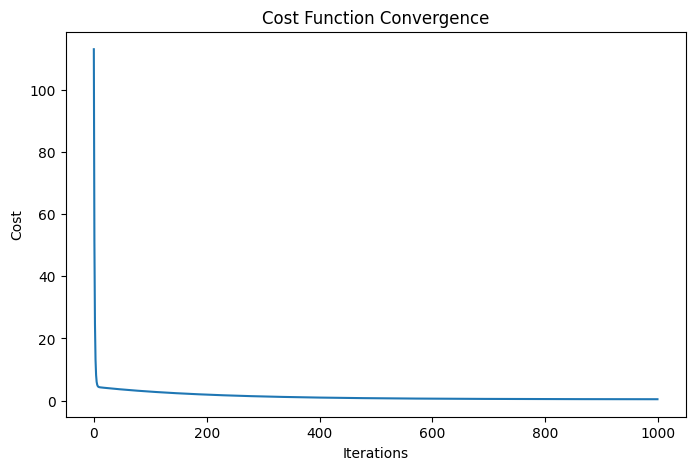

In [9]:
plt.figure(figsize=(8,5))

plt.plot(cost_history)

plt.title("Cost Function Convergence")

plt.xlabel("Iterations")

plt.ylabel("Cost")

plt.show()


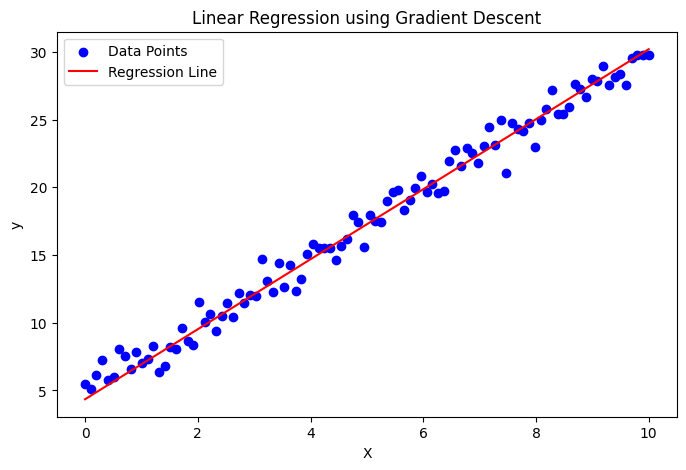

In [10]:
plt.figure(figsize=(8,5))

plt.scatter(X, y, color='blue', label='Data Points')

predictions = X_matrix.dot(theta)

plt.plot(X, predictions, color='red', label='Regression Line')

plt.xlabel("X")

plt.ylabel("y")

plt.title("Linear Regression using Gradient Descent")

plt.legend()

plt.show()


In [11]:
print("\nFinal Model:")

print(f"y = {theta[1][0]:.4f}x + {theta[0][0]:.4f}")



Final Model:
y = 2.5849x + 4.3545


# Problem Statement 2:

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [14]:
# Load dataset
data = pd.read_csv("advertising.csv")

# Display first few rows
print("First 5 rows of dataset:")
print(data.head())


First 5 rows of dataset:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [15]:
print("\nMissing values in each column:")
print(data.isnull().sum())

# Handle missing values if present
data = data.dropna()



Missing values in each column:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [16]:
print("\nSummary statistics:")
print(data.describe())



Summary statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [17]:
X = data[['TV']]      # Independent variable
y = data['Sales']     # Dependent variable


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [19]:
slr_model = LinearRegression()

slr_model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [20]:
intercept = slr_model.intercept_
slope = slr_model.coef_[0]

print("\nSimple Linear Regression Model:")
print("Intercept:", intercept)
print("Slope:", slope)



Simple Linear Regression Model:
Intercept: 7.00710842824185
Slope: 0.05548294393146319


In [21]:
y_pred_slr = slr_model.predict(X_test)


In [22]:
mse_slr = mean_squared_error(y_test, y_pred_slr)
r2_slr = r2_score(y_test, y_pred_slr)

print("\nSLR Performance:")
print("MSE:", mse_slr)
print("R2 Score:", r2_slr)



SLR Performance:
MSE: 6.101072906773963
R2 Score: 0.802561303423698


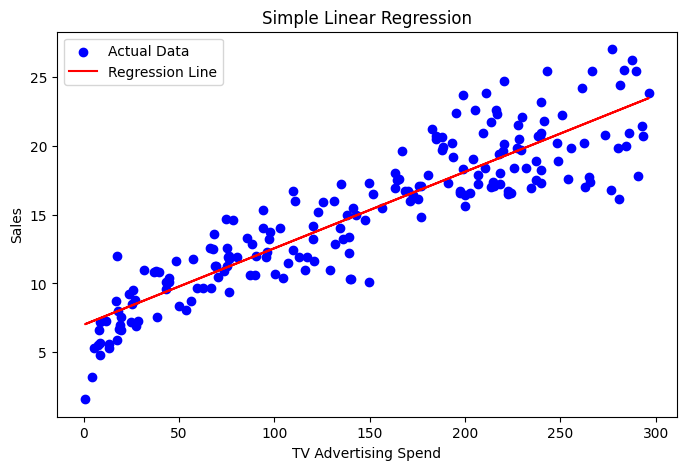

In [23]:
plt.figure(figsize=(8,5))

plt.scatter(X, y, color='blue', label='Actual Data')

plt.plot(X, slr_model.predict(X), color='red', label='Regression Line')

plt.xlabel("TV Advertising Spend")
plt.ylabel("Sales")
plt.title("Simple Linear Regression")

plt.legend()
plt.show()


In [24]:
X_multi = data[['TV', 'Radio', 'Newspaper']]
y_multi = data['Sales']


In [25]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi,
    y_multi,
    test_size=0.2,
    random_state=42
)


In [26]:
mlr_model = LinearRegression()

mlr_model.fit(X_train_m, y_train_m)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [27]:
print("\nMultiple Linear Regression Model:")

print("Intercept:", mlr_model.intercept_)

coefficients = pd.DataFrame({
    "Feature": X_multi.columns,
    "Coefficient": mlr_model.coef_
})

print(coefficients)



Multiple Linear Regression Model:
Intercept: 4.714126402214129
     Feature  Coefficient
0         TV     0.054509
1      Radio     0.100945
2  Newspaper     0.004337


In [28]:
y_pred_mlr = mlr_model.predict(X_test_m)


In [29]:
mse_mlr = mean_squared_error(y_test_m, y_pred_mlr)
r2_mlr = r2_score(y_test_m, y_pred_mlr)

print("\nMLR Performance:")
print("MSE:", mse_mlr)
print("R2 Score:", r2_mlr)



MLR Performance:
MSE: 2.907756910271091
R2 Score: 0.9059011844150826


In [30]:
print("\nModel Comparison")

print("SLR R2:", r2_slr)
print("MLR R2:", r2_mlr)

print("SLR MSE:", mse_slr)
print("MLR MSE:", mse_mlr)



Model Comparison
SLR R2: 0.802561303423698
MLR R2: 0.9059011844150826
SLR MSE: 6.101072906773963
MLR MSE: 2.907756910271091


In [31]:
def calculate_vif(X):

    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_values = []

    for i in range(len(X.columns)):

        y_feature = X.iloc[:, i]
        X_other = X.drop(X.columns[i], axis=1)

        model = LinearRegression()
        model.fit(X_other, y_feature)

        r2 = model.score(X_other, y_feature)

        vif = 1 / (1 - r2)

        vif_values.append(vif)

    vif_data["VIF"] = vif_values

    return vif_data


vif_result = calculate_vif(X_multi)

print("\nVIF Values:")
print(vif_result)



VIF Values:
     Feature       VIF
0         TV  1.004611
1      Radio  1.144952
2  Newspaper  1.145187


# Problem Statement 3:

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [50]:
# Load dataset
data = pd.read_csv("car_price.csv")

# Select only required features
data = data[['Year', 'KM_Driven', 'Transmission', 'Fuel', 'Selling_Price']]

print("First 5 rows:")
print(data.head())


First 5 rows:
   Year  KM_Driven Transmission    Fuel  Selling_Price
0  2007      70000       Manual  Petrol          60000
1  2007      50000       Manual  Petrol         135000
2  2012     100000       Manual  Diesel         600000
3  2017      46000       Manual  Petrol         250000
4  2014     141000       Manual  Diesel         450000


In [51]:
data = pd.get_dummies(data, columns=['Transmission', 'Fuel'], drop_first=True)

print("\nEncoded dataset:")
print(data.head())



Encoded dataset:
   Year  KM_Driven  Selling_Price  Transmission_Manual  Fuel_Diesel  \
0  2007      70000          60000                 True        False   
1  2007      50000         135000                 True        False   
2  2012     100000         600000                 True         True   
3  2017      46000         250000                 True        False   
4  2014     141000         450000                 True         True   

   Fuel_Electric  Fuel_LPG  Fuel_Petrol  
0          False     False         True  
1          False     False         True  
2          False     False        False  
3          False     False         True  
4          False     False        False  


In [52]:
X = data.drop('Selling_Price', axis=1).astype(float).values
y = data['Selling_Price'].astype(float).values.reshape(-1,1)


In [53]:
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

print("\nNumber of training samples:", len(X_train))
print("Number of testing samples:", len(X_test))



Number of training samples: 3472
Number of testing samples: 868


In [54]:
feature_names = data.drop('Selling_Price', axis=1).columns

variances = np.var(X_train, axis=0)

variance_df = pd.DataFrame({
    "Feature": feature_names,
    "Variance": variances
})

print("\nFeature Variance:")
print(variance_df)

print("\nHighest variance feature:")
print(variance_df.loc[variance_df['Variance'].idxmax()])

print("\nLowest variance feature:")
print(variance_df.loc[variance_df['Variance'].idxmin()])



Feature Variance:
               Feature      Variance
0                 Year  1.784603e+01
1            KM_Driven  2.077598e+09
2  Transmission_Manual  9.543688e-02
3          Fuel_Diesel  2.497399e-01
4        Fuel_Electric  0.000000e+00
5             Fuel_LPG  6.011804e-03
6          Fuel_Petrol  2.499970e-01

Highest variance feature:
Feature             KM_Driven
Variance    2077598341.669174
Name: 1, dtype: object

Lowest variance feature:
Feature     Fuel_Electric
Variance              0.0
Name: 4, dtype: object


In [55]:
feature_names = data.drop('Selling_Price', axis=1).columns

variances = np.var(X_train, axis=0)

variance_df = pd.DataFrame({
    "Feature": feature_names,
    "Variance": variances
})

print("\nFeature Variance:")
print(variance_df)

highest = variance_df.loc[variance_df['Variance'].idxmax()]
lowest = variance_df.loc[variance_df['Variance'].idxmin()]

print("\nFeature with highest variance:", highest['Feature'])
print("Feature with lowest variance:", lowest['Feature'])



Feature Variance:
               Feature      Variance
0                 Year  1.784603e+01
1            KM_Driven  2.077598e+09
2  Transmission_Manual  9.543688e-02
3          Fuel_Diesel  2.497399e-01
4        Fuel_Electric  0.000000e+00
5             Fuel_LPG  6.011804e-03
6          Fuel_Petrol  2.499970e-01

Feature with highest variance: KM_Driven
Feature with lowest variance: Fuel_Electric


In [56]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

# prevent division by zero
std[std == 0] = 1

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [57]:
ones_train = np.ones((X_train.shape[0], 1))
ones_test = np.ones((X_test.shape[0], 1))

X_train = np.hstack((ones_train, X_train))
X_test = np.hstack((ones_test, X_test))

In [58]:
np.random.seed(42)

n_features = X_train.shape[1]

W = np.random.randn(n_features, 1)

learning_rate = 0.01
iterations = 1000

cost_history = []

In [59]:
def compute_cost(X, y, W):

    n = len(y)

    predictions = X.dot(W)

    error = predictions - y

    cost = (1/(2*n)) * np.sum(error**2)

    return cost

In [60]:
n = len(y_train)

for i in range(iterations):

    predictions = X_train.dot(W)

    error = predictions - y_train

    gradient = (1/n) * X_train.T.dot(error)

    W = W - learning_rate * gradient

    cost = compute_cost(X_train, y_train, W)

    cost_history.append(cost)

    if i % 100 == 0:
        print(f"Iteration {i}, Cost = {cost}")

Iteration 0, Cost = 290384120386.33673
Iteration 100, Cost = 110895979626.20294
Iteration 200, Cost = 91837643769.12889
Iteration 300, Cost = 89444809515.00208
Iteration 400, Cost = 89117693625.70993
Iteration 500, Cost = 89068108908.23712
Iteration 600, Cost = 89058064079.97395
Iteration 700, Cost = 89054201593.38231
Iteration 800, Cost = 89051521431.36603
Iteration 900, Cost = 89049170572.50093


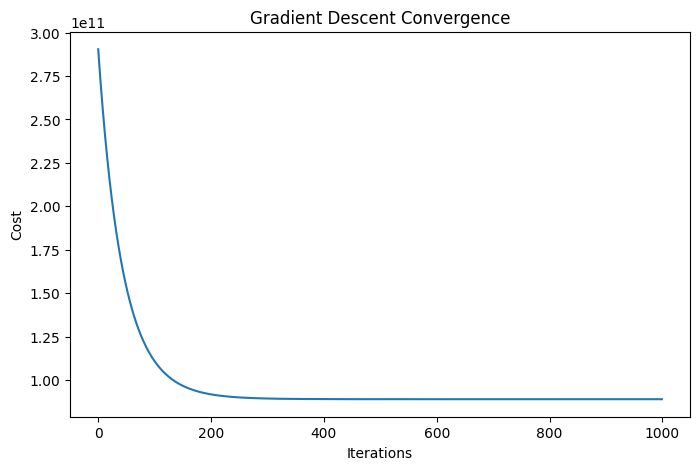

In [61]:
plt.figure(figsize=(8,5))

plt.plot(cost_history)

plt.title("Gradient Descent Convergence")

plt.xlabel("Iterations")

plt.ylabel("Cost")

plt.show()

In [62]:

y_pred = X_test.dot(W)

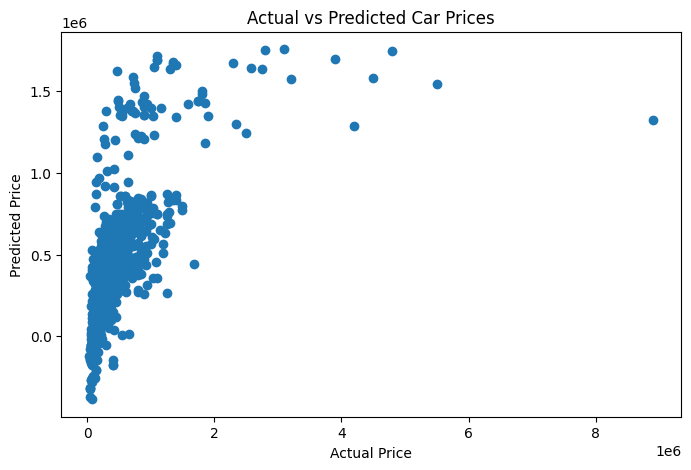

In [63]:
plt.figure(figsize=(8,5))

plt.scatter(y_test, y_pred)

plt.xlabel("Actual Price")

plt.ylabel("Predicted Price")

plt.title("Actual vs Predicted Car Prices")

plt.show()

In [64]:
mse = np.mean((y_pred - y_test)**2)

print("\nMean Squared Error:", mse)


Mean Squared Error: 206317849499.40665


In [65]:
print("\nFinal Weights:")
print(W)


Final Weights:
[[ 5.03581647e+05]
 [ 1.59558146e+05]
 [-6.11363881e+04]
 [-2.73216514e+05]
 [ 9.01729840e+04]
 [-2.34136957e-01]
 [-6.15697933e+03]
 [-6.52765735e+04]]
